In [1]:
import pandas as pd

csv_path = "C:/Users/User/Desktop/MachineLearning/jena_climate_2009_2016.csv"
dataset = pd.read_csv(csv_path)
print(dataset.shape)

(420551, 15)


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [3]:
dataset.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
dataset.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [5]:
dataset.plot(kind="scatter", x="H2OC (mmol/mol)", y="T (degC)",alpha=0.1)
# 수증기 농도
# alpha 옵션을 0.1로 주면 데이터 포인트가 밀집된 영역을 잘 보여줍니다

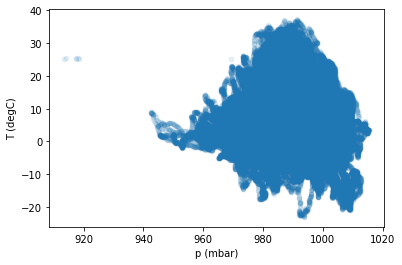

In [6]:
dataset.plot(kind="scatter", x="p (mbar)", y="T (degC)",alpha=0.1)
# 기압

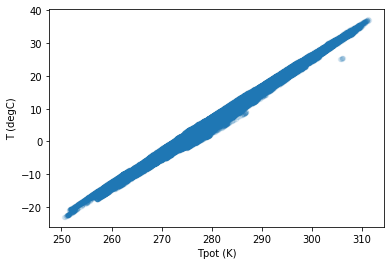

In [7]:
dataset.plot(kind="scatter", x="Tpot (K)", y="T (degC)",alpha=0.1)
# 잠재 온도

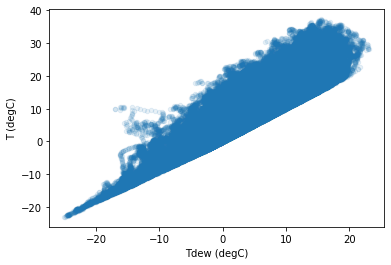

In [8]:
dataset.plot(kind="scatter", x="Tdew (degC)", y="T (degC)",alpha=0.1)
# 이슬점 온도

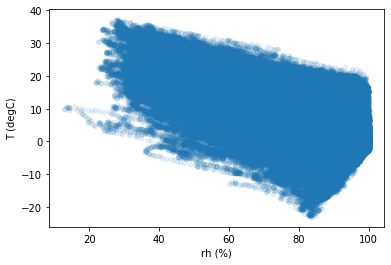

In [9]:
dataset.plot(kind="scatter", x="rh (%)", y="T (degC)",alpha=0.1)
# 상대 습도

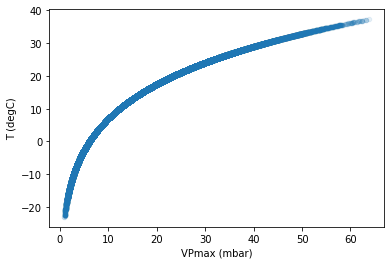

In [10]:
dataset.plot(kind="scatter", x="VPmax (mbar)", y="T (degC)",alpha=0.1)
# 포화 수증기압

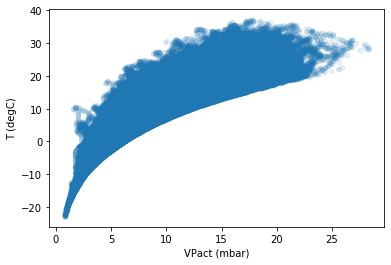

In [11]:
dataset.plot(kind="scatter", x="VPact (mbar)", y="T (degC)",alpha=0.1)
# 실제 수증기압

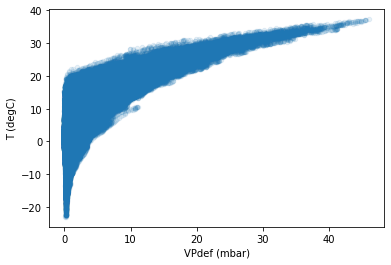

In [12]:
dataset.plot(kind="scatter", x="VPdef (mbar)", y="T (degC)",alpha=0.1)
#수증기압 적자

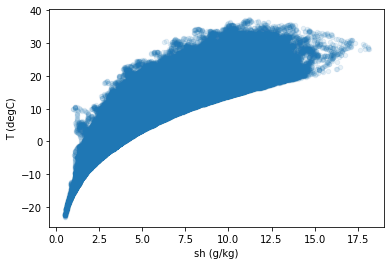

In [13]:
dataset.plot(kind="scatter", x="sh (g/kg)", y="T (degC)",alpha=0.1)
# 특정습도

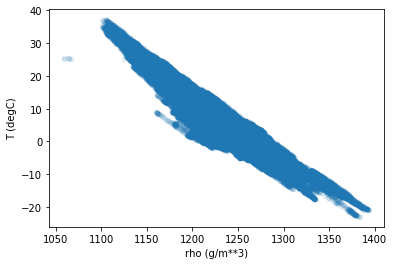

In [14]:
dataset.plot(kind="scatter", x="rho (g/m**3)", y="T (degC)",alpha=0.1)
# 공기 밀도

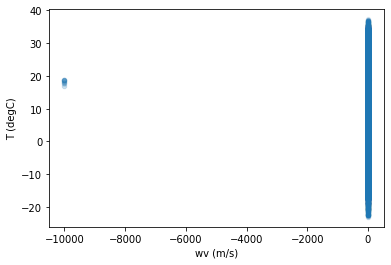

In [15]:
dataset.plot(kind="scatter", x="wv (m/s)", y="T (degC)",alpha=0.1)
# 풍속

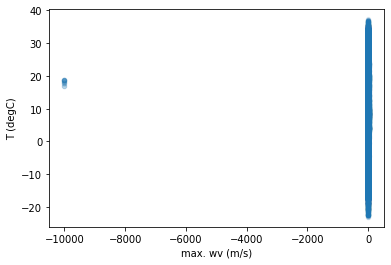

In [16]:
dataset.plot(kind="scatter", x="max. wv (m/s)", y="T (degC)",alpha=0.1)
# 최대 풍속

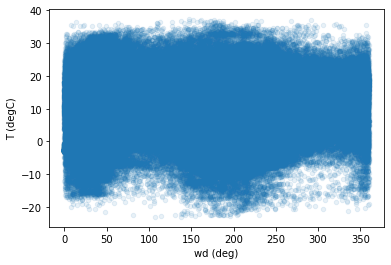

In [17]:
dataset.plot(kind="scatter", x="wd (deg)", y="T (degC)",alpha=0.1)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(dataset, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(336440, 15)
(84111, 15)


In [19]:
corr_matrix = X_train.corr()
print(corr_matrix["T (degC)"].sort_values(ascending=False))

T (degC)           1.000000
Tpot (K)           0.996829
VPmax (mbar)       0.951103
Tdew (degC)        0.895582
VPact (mbar)       0.867566
H2OC (mmol/mol)    0.867071
sh (g/kg)          0.866649
VPdef (mbar)       0.761838
wd (deg)           0.039231
max. wv (m/s)     -0.003467
wv (m/s)          -0.005408
p (mbar)          -0.045002
rh (%)            -0.572855
rho (g/m**3)      -0.963430
Name: T (degC), dtype: float64


In [20]:
train_set = pd.DataFrame(X_train, index = None, columns=["T (degC)", "Tpot (K)", "rho (g/m**3)", "VPmax (mbar)",
                                                         "Tdew (degC)", "VPact (mbar)"])
test_set = pd.DataFrame(X_test, index = None, columns=["T (degC)", "Tpot (K)", "rho (g/m**3)", "VPmax (mbar)", "Tdew (degC)",
                                                       "VPact (mbar)"])


In [21]:
train_num_tr = train_set.drop("T (degC)", axis=1)
train_labels = train_set["T (degC)"].copy()
test_num_tr = test_set.drop("T (degC)", axis=1)
test_labels = test_set["T (degC)"].copy()

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg.fit(train_num_tr, train_labels)

scores = cross_val_score(lin_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=15)
lin_rmse_scores = np.sqrt(-scores)
print('LinearRegression 훈련세트 오차')
print('평균 : ',lin_rmse_scores.mean())
print('표준편차', lin_rmse_scores.std())

Tdeg_test_predictions = lin_reg.predict(test_num_tr)
lin_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
lin_rmse = np.sqrt(lin_mse)
print('LinearRegression 테스트세트 오차')
print(lin_rmse)

LinearRegression 훈련세트 오차
평균 :  0.06287761925172886
표준편차 0.0011281636701831969
LinearRegression 테스트세트 오차
0.06303434541569204


In [23]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_num_tr, train_labels)

scores = cross_val_score(tree_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=15)

tree_rmse_scores = np.sqrt(-scores)
print('DecisionTreeRegressor 훈련세트 오차')
print('평균 : ', tree_rmse_scores.mean())
print('표준편차 : ', tree_rmse_scores.std())

Tdeg_test_predictions = tree_reg.predict(test_num_tr)
tree_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
tree_rmse = np.sqrt(tree_mse)
print('DecisionTreeRegressor 테스트세트 오차')
print(tree_rmse)

DecisionTreeRegressor 훈련세트 오차
평균 :  0.006833206724511537
표준편차 :  9.83798304914233e-05
DecisionTreeRegressor 테스트세트 오차
0.006883957226210422


In [24]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_num_tr, train_labels)

forest_scores = cross_val_score(forest_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('RandomForestRegressor 훈련세트 오차')
print('평균 : ', forest_rmse_scores.mean())
print('표준편차 : ', forest_rmse_scores.std())

Tdeg_test_predictions = forest_reg.predict(test_num_tr)
forest_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
forest_rmse = np.sqrt(forest_mse)
print('RandomForestRegressor 테스트세트 오차')
print(forest_rmse)

RandomForestRegressor 훈련세트 오차
평균 :  0.005654700535175114
표준편차 :  0.00020186570342236928
RandomForestRegressor 테스트세트 오차
0.005602780194662647


In [25]:
#시스템 B
train_set = pd.DataFrame(X_train, index = None, columns=["T (degC)", "Tdew (degC)", "VPact (mbar)", "H2OC (mmol/mol)",
                                                         "sh (g/kg)", "VPdef (mbar)"])
test_set = pd.DataFrame(X_test, index = None, columns=["T (degC)", "Tdew (degC)", "VPact (mbar)", "H2OC (mmol/mol)",
                                                       "sh (g/kg)", "VPdef (mbar)"])


In [26]:
train_num_tr = train_set.drop("T (degC)", axis=1)
train_labels = train_set["T (degC)"].copy()
test_num_tr = test_set.drop("T (degC)", axis=1)
test_labels = test_set["T (degC)"].copy()

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg.fit(train_num_tr, train_labels)

scores = cross_val_score(lin_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=15)
lin_rmse_scores = np.sqrt(-scores)
print('LinearRegression 훈련세트 오차')
print('평균 : ',lin_rmse_scores.mean())
print('표준편차', lin_rmse_scores.std())

Tdeg_test_predictions = lin_reg.predict(test_num_tr)
lin_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
lin_rmse = np.sqrt(lin_mse)
print('LinearRegression 테스트세트 오차')
print(lin_rmse)

LinearRegression 훈련세트 오차
평균 :  1.3324864280658761
표준편차 0.0121299448389193
LinearRegression 테스트세트 오차
1.326177252321604


In [28]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_num_tr, train_labels)

scores = cross_val_score(tree_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=15)

tree_rmse_scores = np.sqrt(-scores)
print('DecisionTreeRegressor 훈련세트 오차')
print('평균 : ', tree_rmse_scores.mean())
print('표준편차 : ', tree_rmse_scores.std())

Tdeg_test_predictions = tree_reg.predict(test_num_tr)
tree_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
tree_rmse = np.sqrt(tree_mse)
print('DecisionTreeRegressor 테스트세트 오차')
print(tree_rmse)

DecisionTreeRegressor 훈련세트 오차
평균 :  0.04034033108408513
표준편차 :  0.0011001309551983338
DecisionTreeRegressor 테스트세트 오차
0.0389673508750577


In [29]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_num_tr, train_labels)

forest_scores = cross_val_score(forest_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('RandomForestRegressor 훈련세트 오차')
print('평균 : ', forest_rmse_scores.mean())
print('표준편차 : ', forest_rmse_scores.std())

Tdeg_test_predictions = forest_reg.predict(test_num_tr)
forest_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
forest_rmse = np.sqrt(forest_mse)
print('RandomForestRegressor 테스트세트 오차')
print(forest_rmse)

RandomForestRegressor 훈련세트 오차
평균 :  0.023912446561227485
표준편차 :  0.0009076625685308443
RandomForestRegressor 테스트세트 오차
0.022311621696514305


In [30]:
#시스템 c
count = 0
for i in dataset["wv (m/s)"]:
    if i == -9999:
        dataset = dataset.drop([count],0)
    count += 1
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420533 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420533 non-null object
p (mbar)           420533 non-null float64
T (degC)           420533 non-null float64
Tpot (K)           420533 non-null float64
Tdew (degC)        420533 non-null float64
rh (%)             420533 non-null float64
VPmax (mbar)       420533 non-null float64
VPact (mbar)       420533 non-null float64
VPdef (mbar)       420533 non-null float64
sh (g/kg)          420533 non-null float64
H2OC (mmol/mol)    420533 non-null float64
rho (g/m**3)       420533 non-null float64
wv (m/s)           420533 non-null float64
max. wv (m/s)      420533 non-null float64
wd (deg)           420533 non-null float64
dtypes: float64(14), object(1)
memory usage: 51.3+ MB
None


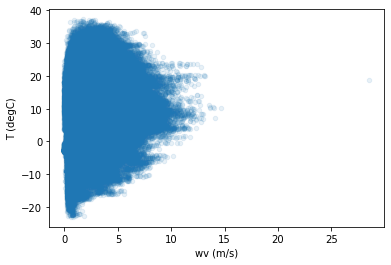

In [31]:
dataset.plot(kind="scatter", x="wv (m/s)", y="T (degC)",alpha=0.1)
# 풍속

In [32]:
X_train, X_test = train_test_split(dataset, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(336426, 15)
(84107, 15)


In [33]:
train_set = pd.DataFrame(X_train, index = None)
test_set = pd.DataFrame(X_test, index = None)

train_num_tr = train_set.drop("T (degC)", axis=1)
train_num_tr = train_num_tr.drop("Date Time", axis=1)
train_labels = train_set["T (degC)"].copy()

test_num_tr = test_set.drop("T (degC)", axis=1)
test_num_tr = test_num_tr.drop("Date Time", axis=1)
test_labels = test_set["T (degC)"].copy()

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
lin_reg.fit(train_num_tr, train_labels)

scores = cross_val_score(lin_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=15)
lin_rmse_scores = np.sqrt(-scores)
print('LinearRegression 훈련세트 오차')
print('평균 : ',lin_rmse_scores.mean())
print('표준편차', lin_rmse_scores.std())

Tdeg_test_predictions = lin_reg.predict(test_num_tr)
lin_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
lin_rmse = np.sqrt(lin_mse)
print('LinearRegression 테스트세트 오차')
print(lin_rmse)

LinearRegression 훈련세트 오차
평균 :  0.009352589714171532
표준편차 0.0001336405267745119
LinearRegression 테스트세트 오차
0.00929211445673843


In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_num_tr, train_labels)

scores = cross_val_score(tree_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=15)

tree_rmse_scores = np.sqrt(-scores)
print('DecisionTreeRegressor 훈련세트 오차')
print('평균 : ', tree_rmse_scores.mean())
print('표준편차 : ', tree_rmse_scores.std())

Tdeg_test_predictions = tree_reg.predict(test_num_tr)
tree_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
tree_rmse = np.sqrt(tree_mse)
print('DecisionTreeRegressor 테스트세트 오차')
print(tree_rmse)

DecisionTreeRegressor 훈련세트 오차
평균 :  0.007022639142547136
표준편차 :  0.00022358314667469254
DecisionTreeRegressor 테스트세트 오차
0.00721747726532938


In [36]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_num_tr, train_labels)

forest_scores = cross_val_score(forest_reg, train_num_tr, train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('RandomForestRegressor 훈련세트 오차')
print('평균 : ', forest_rmse_scores.mean())
print('표준편차 : ', forest_rmse_scores.std())

Tdeg_test_predictions = forest_reg.predict(test_num_tr)
forest_mse = mean_squared_error(test_labels, Tdeg_test_predictions)
forest_rmse = np.sqrt(forest_mse)
print('RandomForestRegressor 테스트세트 오차')
print(forest_rmse)

RandomForestRegressor 훈련세트 오차
평균 :  0.0055607922688988305
표준편차 :  0.00016788217157662495
RandomForestRegressor 테스트세트 오차
0.005488402150895112


In [40]:
count = 0
for i in dataset["max. wv (m/s)"]:
    if i == -9999:
        dataset = dataset.drop(dataset.index[[count]])
    count += 1
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420530 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420530 non-null object
p (mbar)           420530 non-null float64
T (degC)           420530 non-null float64
Tpot (K)           420530 non-null float64
Tdew (degC)        420530 non-null float64
rh (%)             420530 non-null float64
VPmax (mbar)       420530 non-null float64
VPact (mbar)       420530 non-null float64
VPdef (mbar)       420530 non-null float64
sh (g/kg)          420530 non-null float64
H2OC (mmol/mol)    420530 non-null float64
rho (g/m**3)       420530 non-null float64
wv (m/s)           420530 non-null float64
max. wv (m/s)      420530 non-null float64
wd (deg)           420530 non-null float64
dtypes: float64(14), object(1)
memory usage: 51.3+ MB
None


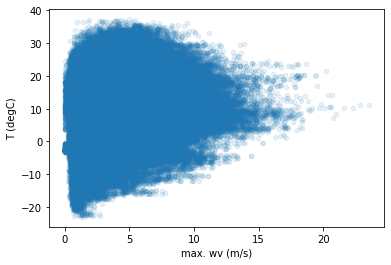

In [41]:
dataset.plot(kind="scatter", x="max. wv (m/s)", y="T (degC)",alpha=0.1)
#최대 풍속

In [47]:
import seaborn as sns
dataframe = pd.read_csv("C:/Users/User/Desktop/MachineLearning/jena_climate_2009_2016.csv")
sns.countplot(x="T (degC)", hue="Survived", data=dataframe)

ValueError: Could not interpret input 'Survived'

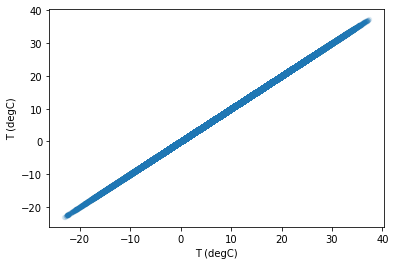

In [49]:
dataset.plot(kind="scatter", x="T (degC)",y="T (degC)",alpha=0.1)